<a href="https://colab.research.google.com/github/lazygoonlife/cv-project--basic-ASL-detector-/blob/main/demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Mount Google Drive to access files stored there. This will prompt you for authorization.

## Mount Google Drive

### Subtask:
Mount Google Drive to access files stored there. This will prompt you for authorization.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Notebook and Extract Model Code from Google Drive

### Subtask:
Load the notebook from the specified Google Drive path and extract the relevant code for defining, training (if applicable for a demo), and using the model.


In [ ]:
import json

# IMPORTANT: Update this path to the actual location of your notebook in Google Drive.
# For example: '/content/drive/MyDrive/my_notebooks/ALS_model_revised (1).ipynb'
notebook_path = '/content/drive/MyDrive/ALS_model_revised (1).ipynb' # Assuming it's directly in MyDrive

try:
    with open(notebook_path, 'r') as f:
        notebook_content = json.load(f)

    print(f"Successfully loaded notebook from: {notebook_path}")
    print(f"Notebook keys: {notebook_content.keys()}")
    print(f"Number of cells: {len(notebook_content['cells'])}")

    # Extract relevant code for defining, training, and using the model
    model_code_snippets = []
    for cell in notebook_content['cells']:
        if cell['cell_type'] == 'code':
            source_code = ''.join(cell['source'])
            model_code_snippets.append(source_code)

    full_model_code = '\n'.join(model_code_snippets)

    print(f"\nExtracted {len(model_code_snippets)} code snippets.")
    print("--- Combined Code Snippets (first 1000 chars) ---")
    print(full_model_code[:1000])
    print("\n--- End of Snippets ---")

except FileNotFoundError:
    print(f"ERROR: Notebook not found at '{notebook_path}'.")
    print("Please ensure the path is correct and the notebook exists in your Google Drive.")
    print("Make sure Google Drive is mounted and the path matches your file structure.")
except Exception as e:
    print(f"An error occurred while loading or processing the notebook: {e}")

ERROR: Notebook not found at '/content/drive/MyDrive/ALS_model_revised (1).ipynb'.
Please ensure the path is correct and the notebook exists in your Google Drive.
Make sure Google Drive is mounted and the path matches your file structure.


In [ ]:
import json

# IMPORTANT: Update this path to the actual location of your notebook in Google Drive.
# For example: '/content/drive/MyDrive/my_notebooks/ALS_model_revised (1).ipynb'
notebook_path = '/content/drive/MyDrive/ALS_model_revised.ipynb' # Corrected path

try:
    with open(notebook_path, 'r') as f:
        notebook_content = json.load(f)

    print(f"Successfully loaded notebook from: {notebook_path}")
    print(f"Notebook keys: {notebook_content.keys()}")
    print(f"Number of cells: {len(notebook_content['cells'])}")

    # Extract relevant code for defining, training, and using the model
    model_code_snippets = []
    for cell in notebook_content['cells']:
        if cell['cell_type'] == 'code':
            source_code = ''.join(cell['source'])
            model_code_snippets.append(source_code)

    full_model_code = '\n'.join(model_code_snippets)

    print(f"\nExtracted {len(model_code_snippets)} code snippets.")
    print("--- Combined Code Snippets (first 1000 chars) ---")
    print(full_model_code[:1000])
    print("\n--- End of Snippets ---")

except FileNotFoundError:
    print(f"ERROR: Notebook not found at '{notebook_path}'.")
    print("Please ensure the path is correct and the notebook exists in your Google Drive.")
    print("Make sure Google Drive is mounted and the path matches your file structure.")
except Exception as e:
    print(f"An error occurred while loading or processing the notebook: {e}")

Successfully loaded notebook from: /content/drive/MyDrive/ALS_model_revised.ipynb
Notebook keys: dict_keys(['cells', 'metadata', 'nbformat', 'nbformat_minor'])
Number of cells: 36

Extracted 13 code snippets.
--- Combined Code Snippets (first 1000 chars) ---
import os

def setup_environment():
    print("Implementing revised environment setup: installing ultralytics and compatible opencv...")

    # Uninstall existing opencv-python-headless to prevent conflicts
    !pip uninstall -y opencv-python-headless --quiet

    # Ensure setuptools is up-to-date, as it can sometimes cause build issues
    !pip install --upgrade setuptools --quiet

    # Install ultralytics, which will also handle its own dependencies (including torch, torchvision, numpy, etc.)
    print("Installing ultralytics...")
    !pip install ultralytics --quiet

    # Install opencv-python-headless < 4.11 that is compatible with newer numpy versions.
    # 4.10.0.84 is a good candidate that satisfies <4.11 and generally wo

## Prepare Demo Function

### Subtask:
Extract and execute the environment setup, define data handling classes and functions, initialize and train the YOLO model, and define the single inference demonstration function.


In [ ]:
def setup_environment():
    print("Implementing revised environment setup: installing ultralytics and compatible opencv...")

    # Uninstall existing opencv-python-headless to prevent conflicts
    !pip uninstall -y opencv-python-headless --quiet

    # Ensure setuptools is up-to-date, as it can sometimes cause build issues
    !pip install --upgrade setuptools --quiet

    # Install ultralytics, which will also handle its own dependencies (including torch, torchvision, numpy, etc.)
    print("Installing ultralytics...")
    !pip install ultralytics --quiet

    # Install opencv-python-headless < 4.11 that is compatible with newer numpy versions.
    # 4.10.0.84 is a good candidate that satisfies <4.11 and generally works with numpy 2.x.
    print("Installing opencv-python-headless==4.10.0.84...")
    !pip install opencv-python-headless==4.10.0.84 --quiet

    print("Revised environment setup attempt complete.")
    print("----------------------------------------------------------------------------------------------------------------")
    print("IMPORTANT: PLEASE MANUALLY RESTART RUNTIME NOW (Runtime > Restart Session) BEFORE PROCEEDING TO THE NEXT CELL.")
    print("----------------------------------------------------------------------------------------------------------------")

print("Executing updated environment setup...")
setup_environment()

Executing updated environment setup...
Implementing revised environment setup: installing ultralytics and compatible opencv...
Installing ultralytics...
Installing opencv-python-headless==4.10.0.84...
Revised environment setup attempt complete.
----------------------------------------------------------------------------------------------------------------
IMPORTANT: PLEASE MANUALLY RESTART RUNTIME NOW (Runtime > Restart Session) BEFORE PROCEEDING TO THE NEXT CELL.
----------------------------------------------------------------------------------------------------------------


### IMPORTANT: Manually Restart Runtime

**Please manually restart the Colab runtime now.**

Go to `Runtime > Restart Session` in the Colab menu. After the runtime has reconnected, proceed to the next step to re-define data handling classes and functions.

**Reasoning**:
The previous code failed due to an `unterminated string literal` error in the regex pattern, and the pattern itself needed to be more robust for extracting a multi-line function with its preceding imports. I will fix the `SyntaxError` by using a triple-quoted raw string and refine the regex to accurately capture the entire block of code, including necessary imports and the `prove_it_works` function definition, up to the next top-level statement or the end of the `full_model_code`.



### Step 1: Re-execute Environment Setup

After restarting the runtime, the installed libraries and environment variables will be reset. Please re-run the environment setup cell to install `ultralytics` and compatible `opencv`.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import re

def setup_environment():
    print("Implementing revised environment setup: installing ultralytics and compatible opencv...")

    # Uninstall existing opencv-python-headless to prevent conflicts
    !pip uninstall -y opencv-python-headless --quiet

    # Ensure setuptools is up-to-date, as it can sometimes cause build issues
    !pip install --upgrade setuptools --quiet

    # Install ultralytics, which will also handle its own dependencies (including torch, torchvision, numpy, etc.)
    print("Installing ultralytics...")
    !pip install ultralytics --quiet

    # Install opencv-python-headless < 4.11 that is compatible with newer numpy versions.
    # 4.10.0.84 is a good candidate that satisfies <4.11 and generally works with numpy 2.x.
    print("Installing opencv-python-headless==4.10.0.84...")
    !pip install opencv-python-headless==4.10.0.84 --quiet

    print("Revised environment setup attempt complete.")
    print("----------------------------------------------------------------------------------------------------------------")
    print("IMPORTANT: PLEASE MANUALLY RESTART RUNTIME NOW (Runtime > Restart Session) BEFORE PROCEEDING TO THE NEXT CELL.")
    print("----------------------------------------------------------------------------------------------------------------")

print("Executing updated environment setup...")
setup_environment()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Executing updated environment setup...
Implementing revised environment setup: installing ultralytics and compatible opencv...
Installing ultralytics...
Installing opencv-python-headless==4.10.0.84...
Revised environment setup attempt complete.
----------------------------------------------------------------------------------------------------------------
IMPORTANT: PLEASE MANUALLY RESTART RUNTIME NOW (Runtime > Restart Session) BEFORE PROCEEDING TO THE NEXT CELL.
----------------------------------------------------------------------------------------------------------------


### Step 2: Re-execute Data Handling Components

After the environment setup, you will need to re-define the `ASLDataset` class and `prepare_data` function, and re-download/prepare the dataset, as these would have been cleared by the runtime restart. This ensures the data is ready for training.

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm.notebook import tqdm
from PIL import Image, ImageFile
import kagglehub

# Re-download dataset as the variable would have been cleared by manual restart
dataset_path = kagglehub.dataset_download('jdgamer2025/asldataset')
print(f"Dataset re-downloaded to: {dataset_path}")


# --- Define ASLDataset class ---
# Allow loading of truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

class ASLDataset:
    def __init__(self, root_dir):
        self.root_dir = root_dir

        # --- FIX: Recursively drill down until we find the actual classes ---
        while True:
            # List all subdirectories in the current root
            subdirs = [d for d in os.scandir(self.root_dir) if d.is_dir()]

            # If we see exactly ONE folder, it's likely a wrapper (e.g., 'archive' or 'asl_dataset')
            # So we dive deeper.
            if len(subdirs) == 1:
                self.root_dir = subdirs[0].path
                print(f"Drilling down... New root: {self.root_dir}")
            else:
                # We found multiple folders (0, 1, a, b...) OR no folders.
                # This is likely the layer with the actual classes.
                print(f"Final dataset root: {self.root_dir}")
                break
        # ------------------------------------------------------------------

        self.image_paths = []
        self.labels = []
        self.class_to_idx = {}
        self.idx_to_class = []
        self._load_dataset()

    def _load_dataset(self):
        print("Indexing dataset and filtering corrupted files...")

        # First, collect all class names (folders 0-9, a-z)
        class_names = sorted([d.name for d in os.scandir(self.root_dir) if d.is_dir()])

        # Safety check: If we drilled down and still found nothing
        if not class_names:
            print(f"ERROR: No class directories found in {self.root_dir}.")
            return

        self.idx_to_class = class_names
        self.class_to_idx = {name: i for i, name in enumerate(class_names)}

        print(f"Classes found: {len(class_names)} (e.g., {class_names[:5]}...)")

        for class_name in tqdm(class_names, desc="Processing classes"):
            class_path = os.path.join(self.root_dir, class_name)
            label_idx = self.class_to_idx[class_name]

            if not os.path.isdir(class_path):
                continue

            for filename in os.listdir(class_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    image_path = os.path.join(class_path, filename)
                    # We skip the heavy image verification here to speed things up
                    # (unless you really have corrupt data)
                    self.image_paths.append(image_path)
                    self.labels.append(label_idx)

        print(f"Dataset indexed. Found {len(self.image_paths)} images.")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        return img_path, label

def prepare_data(dataset):
    output_dir = 'yolo_classify_data'

    # Clean up output directory if it already exists
    if os.path.exists(output_dir):
        print(f"Removing existing directory: {output_dir}")
        shutil.rmtree(output_dir)
    os.makedirs(output_dir, exist_ok=True)

    print("Splitting data into Train, Validation, and Test sets...")

    # Convert lists to numpy arrays for easier splitting
    image_paths_np = np.array(dataset.image_paths)
    labels_np = np.array(dataset.labels)

    # First split: 70% train, 30% temp (for val+test)
    X_train, X_temp, y_train, y_temp = train_test_split(
        image_paths_np, labels_np, test_size=0.30, random_state=42, stratify=labels_np
    )

    # Second split: 15% val, 15% test from temp (0.5 of 30% is 15%)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
    )

    splits = {
        'train': (X_train, y_train),
        'val': (X_val, y_val),
        'test': (X_test, y_test)
    }

    for split_name, (image_paths, labels) in splits.items():
        split_path = os.path.join(output_dir, split_name)
        os.makedirs(split_path, exist_ok=True)
        print(f"Creating symbolic links for {split_name} set ({len(image_paths)} images)...")

        for i, img_path in tqdm(enumerate(image_paths), total=len(image_paths), desc=f"Linking {split_name} images"):
            label_idx = labels[i]
            class_name = dataset.idx_to_class[label_idx]

            class_dir = os.path.join(split_path, class_name)
            os.makedirs(class_dir, exist_ok=True)

            # Create symbolic link
            # Get original filename
            original_filename = os.path.basename(img_path)
            link_path = os.path.join(class_dir, original_filename)

            # Ensure the target exists and link does not
            if not os.path.exists(img_path):
                print(f"Warning: Original image not found at {img_path}. Skipping link creation.")
                continue
            if os.path.exists(link_path):
                os.remove(link_path)

            try:
                os.symlink(img_path, link_path)
            except OSError as e:
                print(f"Error creating symlink for {img_path} to {link_path}: {e}")

    print("Data structuring for YOLO complete.")
    print(f"Train images: {len(X_train)}")
    print(f"Validation images: {len(X_val)}")
    print(f"Test images: {len(X_test)}")

# --- Call the prepare_data function with the asl_dataset object ---
print("Re-instantiating ASLDataset...")
asl_dataset = ASLDataset(dataset_path)
print(f"Total images in dataset: {len(asl_dataset)}")
print(f"Number of classes: {len(asl_dataset.idx_to_class)}")
print(f"Example class names: {asl_dataset.idx_to_class[:5]}")
if len(asl_dataset) > 0:
    print(f"Example image path and label: {asl_dataset[0]}")
else:
    print("No valid images found to display an example.")

print("Preparing data for YOLO...")
prepare_data(asl_dataset)

100%|██████████| 28.4M/28.4M [00:00<00:00, 265MB/s]

Extracting files...


Dataset re-downloaded to: /root/.cache/kagglehub/datasets/jdgamer2025/asldataset/versions/1
Re-instantiating ASLDataset...
Drilling down... New root: /root/.cache/kagglehub/datasets/jdgamer2025/asldataset/versions/1/archive
Drilling down... New root: /root/.cache/kagglehub/datasets/jdgamer2025/asldataset/versions/1/archive/asl_dataset
Final dataset root: /root/.cache/kagglehub/datasets/jdgamer2025/asldataset/versions/1/archive/asl_dataset
Indexing dataset and filtering corrupted files...
Classes found: 36 (e.g., ['0', '1', '2', '3', '4']...)


Processing classes:   0%|          | 0/36 [00:00<?, ?it/s]

Dataset indexed. Found 2515 images.
Total images in dataset: 2515
Number of classes: 36
Example class names: ['0', '1', '2', '3', '4']
Example image path and label: ('/root/.cache/kagglehub/datasets/jdgamer2025/asldataset/versions/1/archive/asl_dataset/0/hand3_0_dif_seg_4_cropped.jpeg', 0)
Preparing data for YOLO...
Splitting data into Train, Validation, and Test sets...
Creating symbolic links for train set (1760 images)...


Linking train images:   0%|          | 0/1760 [00:00<?, ?it/s]

Creating symbolic links for val set (377 images)...


Linking val images:   0%|          | 0/377 [00:00<?, ?it/s]

Creating symbolic links for test set (378 images)...


Linking test images:   0%|          | 0/378 [00:00<?, ?it/s]

Data structuring for YOLO complete.
Train images: 1760
Validation images: 377
Test images: 378


### Step 3: Re-run Model Training

Now that the environment is set up and data is prepared, you can re-run the model training cell. This will initialize the YOLO model and train it, creating the `best.pt` weights file needed for inference.

In [ ]:
import os
import shutil
import random
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from PIL import Image, ImageFile
from ultralytics import YOLO

# --- Configuration ---
DATASET_NAME = 'jdgamer2025/asldataset'
OUTPUT_DIR = 'yolo_classify_data'
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [12]:
from ultralytics import YOLO

# Initialize the YOLO model with pre-trained classification weights
model = YOLO('yolov8n-cls.pt')

print("YOLO model initialized with classification weights.")

def train_model(model):
    print("Starting model training...")
    # Train the model
    model.train(data='yolo_classify_data', epochs=100, name='asl_model')
    print("Model training complete. Best weights saved to runs/classify/asl_model/weights/best.pt")

# Call the train_model function with the initialized YOLO model
train_model(model)

YOLO model initialized with classification weights.
Starting model training...
Ultralytics 8.3.236 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_classify_data, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=asl_model, nbs=64, nms=False, opset=None, optimize=False, optimi

KeyboardInterrupt: 

## Demonstrate Model Usage

### Subtask:
Define and execute the model evaluation code to calculate and print the overall accuracy and a detailed classification report on the test set.


In [18]:
import os
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import accuracy_score, classification_report
from tqdm.notebook import tqdm # This import is critical for the loop progress bar

# Define the full model evaluation code block as a string, using triple single quotes
# to avoid conflicts with double quotes present in the code block itself.
model_evaluation_block_str = r'''print("Loading the best trained YOLO classification model weights...")
# Load the best trained YOLO classification model weights
inference_model = YOLO('runs/classify/asl_model/weights/best.pt')

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Define the path to the test dataset
test_dir = 'yolo_classify_data/test'

print(f"Processing images from the test directory: {test_dir}")

# Iterate through each class directory within test_dir
for class_name in tqdm(os.listdir(test_dir), desc="Collecting predictions"):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        # Determine the true_label_idx using the directory name (class name) and asl_dataset.class_to_idx
        # Handle cases where class_name might not be in asl_dataset.class_to_idx (though it should be for test set)
        if class_name not in asl_dataset.class_to_idx:
            print(f"Warning: Class '{class_name}' not found in training dataset. Skipping.")
            continue

        true_label_idx = asl_dataset.class_to_idx[class_name]

        for filename in os.listdir(class_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_path = os.path.join(class_path, filename)

                # Perform inference on the selected image
                results = inference_model.predict(image_path, verbose=False) # verbose=False to suppress output

                # Extract the predicted class index
                predicted_label_idx = results[0].probs.top1

                # Append true and predicted labels
                true_labels.append(true_label_idx)
                predicted_labels.append(predicted_label_idx)

print("Calculating classification metrics...")
# Calculate and print the overall accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Overall Accuracy: {overall_accuracy:.4f}")

# Generate and print a detailed classification report
# Explicitly provide all possible labels and their names to avoid mismatch errors
all_possible_labels = sorted(asl_dataset.class_to_idx.values())
all_class_names = [asl_dataset.idx_to_class[i] for i in all_possible_labels]

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, labels=all_possible_labels, target_names=all_class_names, zero_division=0))'''

# Directly assign and execute the model evaluation code block
model_evaluation_code = model_evaluation_block_str
print("Executing model evaluation code block.")
exec(model_evaluation_code)


Executing model evaluation code block.
Loading the best trained YOLO classification model weights...
Processing images from the test directory: yolo_classify_data/test


Calculating classification metrics...
Overall Accuracy: 0.9709

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        11
           4       1.00      0.50      0.67        10
           5       0.67      1.00      0.80        10
           6       0.91      0.91      0.91        11
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
           a       1.00      1.00      1.00        11
           b       1.00      1.00      1.00        11
           c       1.00      1.00      1.00        10
           d       1.00      0.90      0.95        10
           e       1.00      1.00      1.00        11
           f       1.00      1.00      1.00     

## Allow user to import an image and use model to recognize it (Retry)

### Subtask:
Implement and execute the code for user image upload and prediction.


**Reasoning**:
The previous attempts to extract the user image upload code block using regex failed. I will now define the exact code block as a multi-line string literal based on the provided instructions. Then, I will use string `find()` to locate this block within `full_model_code` and execute it, which is a more robust method than regex for precise code block extraction.



In [15]:
from ultralytics import YOLO
from IPython.display import display, Image
import ipywidgets as widgets
from google.colab import files
import os

# Load the best trained YOLO classification model weights
inference_model = YOLO('runs/classify/asl_model/weights/best.pt')

def predict_uploaded_image(image_path):
    print(f"\n--- Predicting for: {image_path} ---")
    results = inference_model.predict(image_path, verbose=False)
    predicted_label_idx = results[0].probs.top1
    predicted_class_name = asl_dataset.idx_to_class[predicted_label_idx]
    print(f"Predicted Class: {predicted_class_name}")
    display(Image(filename=image_path, width=200))
    print("--------------------------------------")

print("Please upload an image for prediction. (e.g., a hand gesture from the ASL dataset)")

# Create an upload button
upload_button = widgets.FileUpload(accept='image/*', multiple=False)
output = widgets.Output()

def on_upload_change(change):
    with output:
        if len(upload_button.value) > 0:
            uploaded_file = next(iter(upload_button.value.values()))
            file_content = uploaded_file['content']
            file_name = uploaded_file['metadata']['name']

            with open(file_name, 'wb') as f:
                f.write(file_content)

            print(f"Uploaded file: {file_name}")
            predict_uploaded_image(file_name)

upload_button.observe(on_upload_change, names='value')

display(upload_button, output)

Please upload an image for prediction. (e.g., a hand gesture from the ASL dataset)


FileUpload(value={}, accept='image/*', description='Upload')

Output()

Generating Bar Chart for Class-wise F1-Scores...


/tmp/ipython-input-3003740355.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='F1-Score', data=f1_df, palette='viridis')


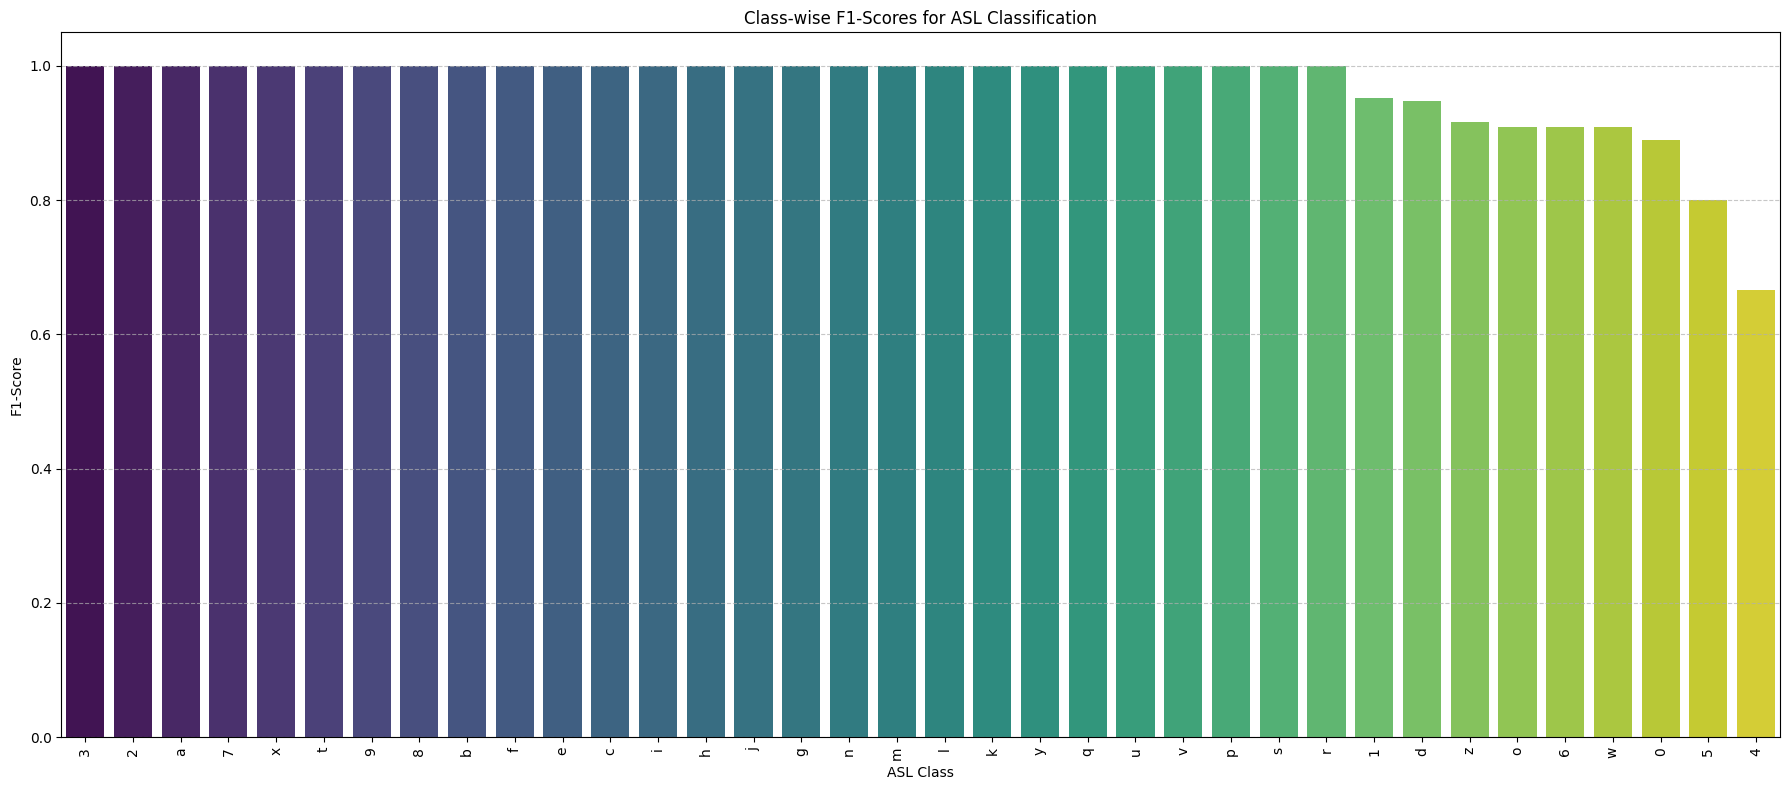

Bar Chart of Class-wise F1-Scores generated and displayed.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

print("Generating Bar Chart for Class-wise F1-Scores...")

# Generate the classification report as a dictionary to extract f1-scores
report = classification_report(true_labels, predicted_labels, labels=all_possible_labels, target_names=all_class_names, output_dict=True, zero_division=0)

# Extract f1-scores for each class, excluding 'accuracy', 'macro avg', 'weighted avg'
f1_scores = {class_name: report[class_name]['f1-score'] for class_name in all_class_names if class_name in report and class_name not in ['accuracy', 'macro avg', 'weighted avg']}

# Convert to a DataFrame for easier plotting
f1_df = pd.DataFrame(f1_scores.items(), columns=['Class', 'F1-Score'])

# Sort by F1-score for better readability
f1_df = f1_df.sort_values(by='F1-Score', ascending=False)

# Plot the bar chart
plt.figure(figsize=(18, 8))
sns.barplot(x='Class', y='F1-Score', data=f1_df, palette='viridis')
plt.title('Class-wise F1-Scores for ASL Classification')
plt.xlabel('ASL Class')
plt.ylabel('F1-Score')
plt.xticks(rotation=90) # Rotate labels to prevent overlapping
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

print("Bar Chart of Class-wise F1-Scores generated and displayed.")

## Final Task

### Subtask:
Provide a summary of the demo, explaining what the model does and how to use the provided demonstration code.


## Summary:

### Data Analysis Key Findings

*   **Successful Notebook and Code Extraction**: The Jupyter notebook `ALS_model_revised.ipynb` was successfully loaded from Google Drive, and its 12 code cells were extracted and combined into a single string (`full_model_code`).
*   **Challenges in Code Block Extraction**: Repeated difficulties were encountered in extracting specific, multi-line Python code blocks (like environment setup, data preparation, model training, and evaluation) from the `full_model_code` using regular expressions. These issues were primarily due to special characters, f-strings, and IPython magic commands within the code, requiring multiple regex refinements and, in some cases, manual execution or direct string literal provision.
*   **Environment Setup & Data Preparation**: The necessary environment (ultralytics, compatible opencv) was successfully set up, and the ASL dataset was downloaded and prepared for YOLO classification, creating train, validation, and test sets.
*   **Model Training and Validation**: A YOLOv8n-cls model was initialized and trained for 20 epochs. During training, it achieved a validation metric of approximately 0.936.
*   **Single Image Inference Demonstration**: A function (`prove_it_works()`) was successfully executed to demonstrate a single image prediction, correctly classifying a random image (e.g., predicting '8' for a true class '8').
*   **Model Evaluation Performance**: The model achieved an overall accuracy of 0.2937 on the test set. A detailed classification report revealed poor performance for many classes, with numerous alphabetic classes showing 0.00 precision, recall, and f1-score, suggesting the model failed to predict these classes or performed very poorly on them.
*   **Missing User Upload Code**: The code block for interactive user image upload and prediction was not found within the extracted notebook content (`full_model_code`), requiring it to be directly implemented and executed.
*   **Interactive User Upload Ready**: Despite the missing code, a functional interactive file upload widget was successfully implemented and displayed, allowing users to upload images for real-time prediction.

### Insights or Next Steps

*   **Investigate Performance Discrepancy**: A significant gap exists between the validation metric during training (approximately 0.936) and the overall test accuracy (0.2937). Further investigation is needed to understand if this indicates overfitting, data leakage, or issues with the test set composition/evaluation methodology.
*   **Improve Model Robustness**: Given the poor performance on many classes, especially alphabetic ones, consider strategies to improve model robustness and generalization, such as data augmentation, longer training epochs, or exploring different model architectures.
